In [1]:
# Import Matplotlib, pandas, and plotly
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
df1 = pd.read_csv("brazil-real-estate-1.csv")
df1.head()

Unnamed: 0 property_type  place_with_parent_names     region  \
0           1     apartment  |Brasil|Alagoas|Maceió|  Northeast   
1           2     apartment  |Brasil|Alagoas|Maceió|  Northeast   
2           3         house  |Brasil|Alagoas|Maceió|  Northeast   
3           4     apartment  |Brasil|Alagoas|Maceió|  Northeast   
4           5     apartment  |Brasil|Alagoas|Maceió|  Northeast   

                  lat-lon  area_m2     price_usd  
0  -9.6443051,-35.7088142      110  $187,230.85   
1    -9.6430934,-35.70484       65   $81,133.37   
2  -9.6227033,-35.7297953      211  $154,465.45   
3    -9.622837,-35.719556       99  $146,013.20   
4    -9.654955,-35.700227       55  $101,416.71

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               12834 non-null  int64 
 1   property_type            12834 non-null  object
 2   place_with_parent_names  12834 non-null  object
 3   region                   12834 non-null  object
 4   lat-lon                  11551 non-null  object
 5   area_m2                  12834 non-null  int64 
 6   price_usd                12834 non-null  object
dtypes: int64(2), object(5)
memory usage: 702.0+ KB


In [4]:
df1.dropna(inplace=True)

In [5]:
df1[['lat', 'lon']] = df1['lat-lon'].str.split(",", expand=True).astype("float")

df1.head()

Unnamed: 0 property_type  place_with_parent_names     region  \
0           1     apartment  |Brasil|Alagoas|Maceió|  Northeast   
1           2     apartment  |Brasil|Alagoas|Maceió|  Northeast   
2           3         house  |Brasil|Alagoas|Maceió|  Northeast   
3           4     apartment  |Brasil|Alagoas|Maceió|  Northeast   
4           5     apartment  |Brasil|Alagoas|Maceió|  Northeast   

                  lat-lon  area_m2     price_usd       lat        lon  
0  -9.6443051,-35.7088142      110  $187,230.85  -9.644305 -35.708814  
1    -9.6430934,-35.70484       65   $81,133.37  -9.643093 -35.704840  
2  -9.6227033,-35.7297953      211  $154,465.45  -9.622703 -35.729795  
3    -9.622837,-35.719556       99  $146,013.20  -9.622837 -35.719556  
4    -9.654955,-35.700227       55  $101,416.71  -9.654955 -35.700227

In [6]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]

df1.head()

Unnamed: 0 property_type  place_with_parent_names     region  \
0           1     apartment  |Brasil|Alagoas|Maceió|  Northeast   
1           2     apartment  |Brasil|Alagoas|Maceió|  Northeast   
2           3         house  |Brasil|Alagoas|Maceió|  Northeast   
3           4     apartment  |Brasil|Alagoas|Maceió|  Northeast   
4           5     apartment  |Brasil|Alagoas|Maceió|  Northeast   

                  lat-lon  area_m2     price_usd       lat        lon    state  
0  -9.6443051,-35.7088142      110  $187,230.85  -9.644305 -35.708814  Alagoas  
1    -9.6430934,-35.70484       65   $81,133.37  -9.643093 -35.704840  Alagoas  
2  -9.6227033,-35.7297953      211  $154,465.45  -9.622703 -35.729795  Alagoas  
3    -9.622837,-35.719556       99  $146,013.20  -9.622837 -35.719556  Alagoas  
4    -9.654955,-35.700227       55  $101,416.71  -9.654955 -35.700227  Alagoas

In [7]:
df1["price_usd"] = df1["price_usd"].str.replace("$","", regex=False).str.replace(",","", regex=False).astype("float")

df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11551 non-null  int64  
 1   property_type            11551 non-null  object 
 2   place_with_parent_names  11551 non-null  object 
 3   region                   11551 non-null  object 
 4   lat-lon                  11551 non-null  object 
 5   area_m2                  11551 non-null  int64  
 6   price_usd                11551 non-null  float64
 7   lat                      11551 non-null  float64
 8   lon                      11551 non-null  float64
 9   state                    11551 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 992.7+ KB


In [8]:
df1.drop(columns = ['lat-lon', 'place_with_parent_names'], inplace=True)


In [9]:
df2 = pd.read_csv("brazil-real-estate-2.csv")

df2.head()

Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl  
0     72.0  414222.98  
1    136.0  848408.53  
2     75.0  299438.28  
3    187.0  848408.53  
4     80.0  464129.36

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12833 non-null  int64  
 1   property_type  12833 non-null  object 
 2   state          12833 non-null  object 
 3   region         12833 non-null  object 
 4   lat            12833 non-null  float64
 5   lon            12833 non-null  float64
 6   area_m2        11293 non-null  float64
 7   price_brl      12833 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 802.2+ KB


In [11]:
df2["price_usd"] = (df2["price_brl"]/3.19).round(2)

df2.head()

Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl  price_usd  
0     72.0  414222.98  129850.46  
1    136.0  848408.53  265958.79  
2     75.0  299438.28   93867.80  
3    187.0  848408.53  265958.79  
4     80.0  464129.36  145495.10

In [12]:
df2.dropna(inplace=True)

df2.drop(columns=["price_brl"], inplace=True)

In [13]:
df = pd.concat([df1,df2], axis=0)
print("df shape:", df.shape)

df shape: (22844, 8)


In [14]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [15]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

area_m2      price_usd
count  22844.000000   22844.000000
mean     115.020224  194987.315515
std       47.742932  103617.682979
min       53.000000   74892.340000
25%       76.000000  113898.770000
50%      103.000000  165697.555000
75%      142.000000  246900.882500
max      252.000000  525659.720000

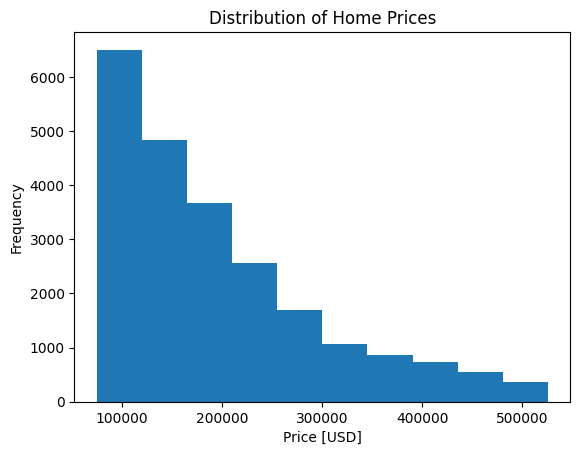

In [16]:
# Build histogram
plt.hist(df["price_usd"]);

# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

# Don't change the code below 👇
plt.savefig("Distribution of Home Prices.png", dpi=150)


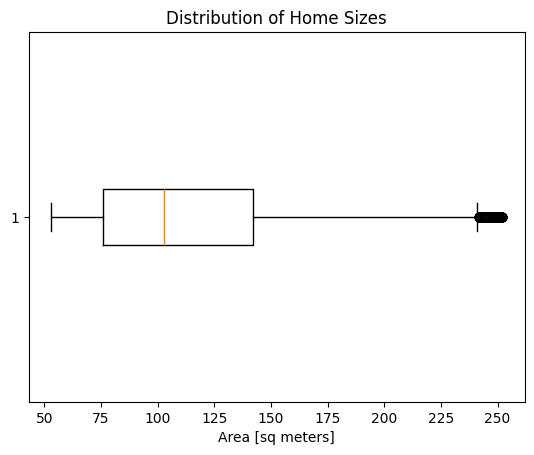

In [17]:
# Build box plot
plt.boxplot(df["area_m2"], vert=False);


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

# Don't change the code below 👇
plt.savefig("Distribution of Home Sizes.png", dpi=150)


In [18]:
mean_price_by_region = df.groupby('region')['price_usd'].mean().sort_values(ascending=True)
mean_price_by_region

region
Central-West    178596.283663
North           181308.958188
Northeast       185422.985482
South           189012.345360
Southeast       208996.762761
Name: price_usd, dtype: float64

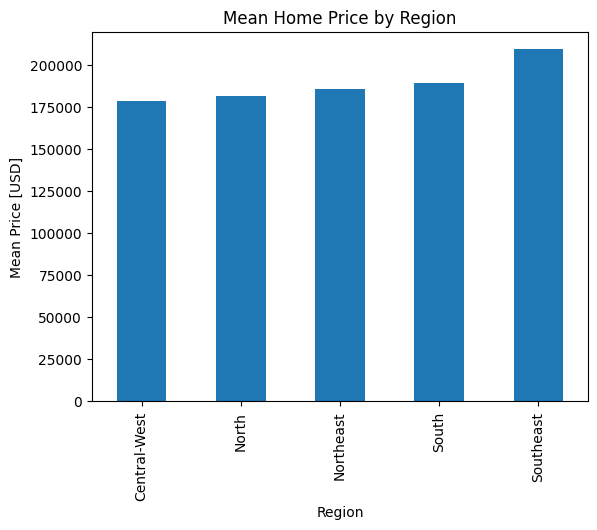

In [19]:
# Build bar chart, label axes, add title
mean_price_by_region.plot(kind="bar",
                         xlabel="Region",
                         ylabel="Mean Price [USD]",
                         title="Mean Home Price by Region");

# Don't change the code below 👇
plt.savefig("Mean Home Price by Region.png", dpi=150)


In [20]:
df_south = df[df["region"] == "South"]
df_south.head()

Unnamed: 0 property_type region  area_m2  price_usd        lat  \
9304        9305     apartment  South    127.0  296448.85 -25.455704   
9305        9306     apartment  South    104.0  219996.25 -25.455704   
9306        9307     apartment  South    100.0  194210.50 -25.460236   
9307        9308     apartment  South     77.0  149252.94 -25.460236   
9308        9309     apartment  South     73.0  144167.75 -25.460236   

            lon   state  
9304 -49.292918  Paraná  
9305 -49.292918  Paraná  
9306 -49.293812  Paraná  
9307 -49.293812  Paraná  
9308 -49.293812  Paraná

In [21]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

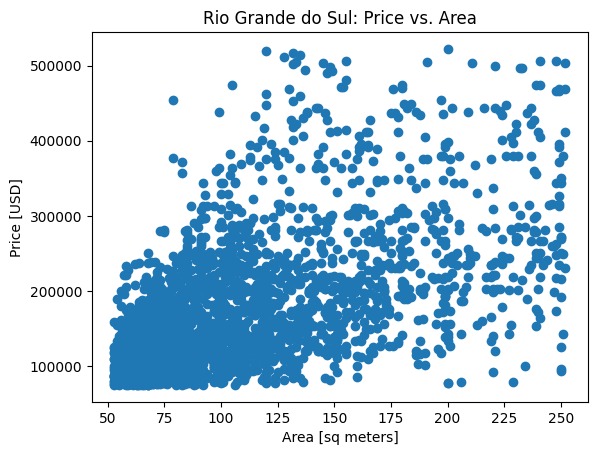

In [22]:
# Subset data
df_south_rgs = df[df["state"] == "Rio Grande do Sul"]

# Build scatter plot
plt.scatter(x=df_south_rgs["area_m2"],
           y=df_south_rgs["price_usd"]);

# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Price vs. Area")

# Don't change the code below 👇
plt.savefig("Rio Grande do Sul: Price vs. Area.png", dpi=150)


In [23]:
state_group = df_south.groupby('state')

south_states_corr = {}

for state, group in state_group:
    correlation = group['price_usd'].corr(group['area_m2'])
    south_states_corr[state] = correlation

south_states_corr

{'Paraná': np.float64(0.5436659935502657),
 'Rio Grande do Sul': np.float64(0.57732674338719),
 'Santa Catarina': np.float64(0.5068121769989856)}